<a href="https://colab.research.google.com/github/sinaseyfi73/simulating_gbm_python/blob/master/ECF_hm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import stat
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
!pip install linearmodels
from linearmodels import IV2SLS 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 1.5 MB 4.0 MB/s 
     |████████████████████████████████| 9.5 MB 17.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [58]:
path = '/content/drive/MyDrive/PhD/ECF/Merge.xlsx'
data = pd.read_excel(path, sheet_name='Sheet2')

data = data[data.columns[:14]]
data

,Ticker,Year,Coname,FamFirm,meanagef,assets,bs_volatility,roa,founderCEO,Q,digit2_in,hightech,nonfounderfam,industry name
0,9441B,1992,BORDEN INC,0,0.0,5321.399902,0.190,-3.958,0,1.559016,28,0,0,Chemical & Allied Products
1,9441B,1993,BORDEN INC,0,0.0,3871.699951,0.221,-1.470,0,1.557168,28,0,0,Chemical & Allied Products
2,AA,1992,ALUMINUM COMPANY AMER,0,95.0,11023.099609,0.246,0.184,0,1.235134,33,0,0,Primary Metal Industries
3,AA,1993,ALUMINUM COMPANY AMER,0,95.0,11596.900391,0.228,0.023,0,1.224374,33,0,0,Primary Metal Industries
4,AA,1994,ALUMINUM COMPANY AMER,0,95.0,12353.200195,0.222,3.570,0,1.307375,33,0,0,Primary Metal Industries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,Z,1993,WOOLWORTH CORP,0,95.0,4593.000000,0.252,-10.777,0,1.449708,56,0,0,Apparel & Accessory Stores
2198,Z,1994,WOOLWORTH CORP,0,95.0,4173.000000,0.300,1.126,0,1.174683,56,0,0,Apparel & Accessory Stores
2199,Z,1995,WOOLWORTH CORP,0,95.0,3506.000000,0.315,-4.678,0,1.076390,56,0,0,Apparel & Accessory Stores
2200,Z,1996,WOOLWORTH CORP,0,95.0,3476.000000,0.365,4.862,0,1.401959,56,0,0,Apparel & Accessory Stores


In [3]:
data['industry name']

0       Chemical & Allied Products
1       Chemical & Allied Products
2         Primary Metal Industries
3         Primary Metal Industries
4         Primary Metal Industries
                   ...            
2197    Apparel & Accessory Stores
2198    Apparel & Accessory Stores
2199    Apparel & Accessory Stores
2200    Apparel & Accessory Stores
2201    Apparel & Accessory Stores
Name: industry name, Length: 2202, dtype: object

In [59]:
data2 = data.reset_index().set_index(['Ticker', 'Year'])
data2['assets'] = np.log(data2['assets'])


Text(0.5, 0, 'Firms')

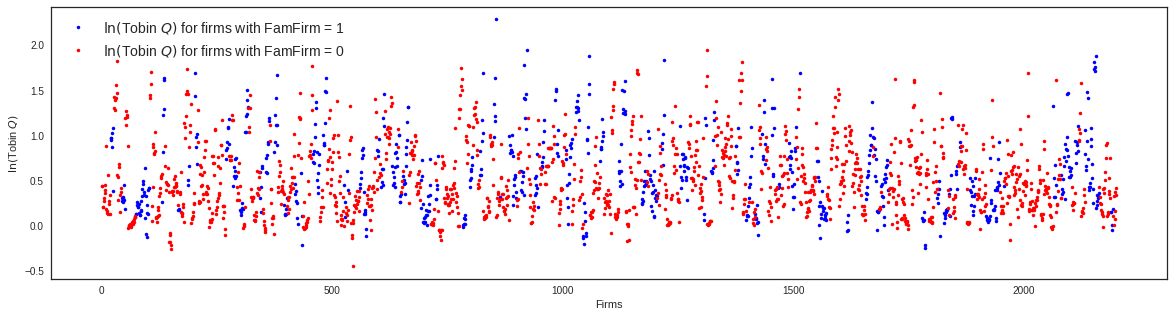

In [114]:
#plt.scatter(data['Q'][data['FamFirm'] == 1], data['Q'][data['FamFirm'] == 0])

plt.figure(figsize= (20, 5), facecolor=(1, 1, 1), edgecolor='black')
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
plt.plot(np.log(data['Q'][data['FamFirm'] == 1]), '.',  color = 'blue', label = '$\ln($Tobin $Q)$ for firms with FamFirm = 1')
plt.plot(np.log(data['Q'][data['FamFirm'] == 0]), '.', color = 'red', label = '$\ln($Tobin $Q)$ for firms with FamFirm = 0')
plt.legend(fontsize = 14)
plt.ylabel('$\ln($Tobin $Q)$')
plt.xlabel('Firms')

In [117]:
scipy.stats.ks_2samp(data['Q'][data['FamFirm'] == 1], data['Q'][data['FamFirm'] == 0])

Ks_2sampResult(statistic=0.12059869908842935, pvalue=1.2344792866825216e-06)

In [108]:
data['Q'][data['FamFirm'] == 1].mean() - data['Q'][data['FamFirm'] == 0].mean()

0.1917600270322375

In [96]:
print(scipy.stats.ttest_ind(data['Q'][data['FamFirm'] == 1], data['Q'][data['FamFirm'] == 0]))
print(scipy.stats.ttest_ind(data['Q'][data['founderCEO'] == 1], data['Q'][data['founderCEO'] == 0]))
print(scipy.stats.ttest_ind(data['Q'][data['nonfounderfam'] == 1], data['Q'][data['nonfounderfam'] == 0]))

Ttest_indResult(statistic=4.540403903173263, pvalue=5.917755129690558e-06)
Ttest_indResult(statistic=3.2861620518380636, pvalue=0.0010315868029052836)
Ttest_indResult(statistic=2.872260224455943, pvalue=0.00411450341109251)


In [5]:
statistics_A = pd.DataFrame(index = data2.mean().index,
                            columns = ['mean', 'median', 'std', 'max', 'min'])


statistics_A['mean'] = data2.mean()
statistics_A['median'] = data2.median()
statistics_A['std'] = data2.std()
statistics_A['max'] = data2.max()
statistics_A['min'] = data2.min()
statistics_A

,mean,median,std,max,min
index,1100.500000,1100.500000,635.806968,2201,0
FamFirm,0.330154,0.000000,0.470375,1,0
meanagef,58.105359,95.000000,44.457991,95,0
assets,8.624517,8.517563,1.197309,12.701,5.74918
bs_volatility,0.273944,0.253000,0.097042,1.052,0
roa,5.407104,5.349500,5.829786,46.206,-49.401
founderCEO,0.068120,0.000000,0.252009,1,0
Q,1.894827,1.582859,0.936149,9.84748,0.635376
digit2_in,39.704360,36.000000,16.033452,87,10
hightech,0.196639,0.000000,0.397548,1,0


In [6]:
data2[data2['FamFirm'] == 1].mean()

statistics_B = pd.DataFrame(index = statistics_A.index.drop(['FamFirm', 'nonfounderfam']),
                            columns = ['FamFirm', 'non FamFirm', 'nonfounderfam', 'founderfam', 't1', 't2'])

statistics_B['FamFirm'] = data2[data2['FamFirm'] == 1].mean().drop(['FamFirm', 'nonfounderfam'])
statistics_B['non FamFirm'] = data2[data2['FamFirm'] == 0].mean().drop(['FamFirm', 'nonfounderfam'])
statistics_B['nonfounderfam'] = data2[data2['nonfounderfam'] == 1].mean().drop(['FamFirm', 'nonfounderfam'])
statistics_B['founderfam'] = data2[data2['nonfounderfam'] == 0].mean().drop(['FamFirm', 'nonfounderfam'])

statistics_B

,FamFirm,non FamFirm,nonfounderfam,founderfam,t1,t2
index,1109.547455,1096.040678,1110.340171,1096.940012,NaN,NaN
meanagef,52.741747,60.748983,56.441168,58.707431,NaN,NaN
assets,8.247712,8.810238,8.287006,8.746623,NaN,NaN
bs_volatility,0.276905,0.272484,0.256467,0.280267,NaN,NaN
roa,6.260246,4.986607,6.143802,5.140581,NaN,NaN
founderCEO,0.195323,0.005424,0.000000,0.092764,NaN,NaN
Q,2.023277,1.831517,1.989937,1.860419,NaN,NaN
digit2_in,39.862448,39.626441,38.001709,40.320346,NaN,NaN
hightech,0.178817,0.205424,0.128205,0.221398,NaN,NaN


In [7]:
print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['meanagef'],
                data2[data2['FamFirm'] == 0]['meanagef']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['assets'],
                data2[data2['FamFirm'] == 0]['assets']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['bs_volatility'],
                data2[data2['FamFirm'] == 0]['bs_volatility']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['roa'],
                data2[data2['FamFirm'] == 0]['roa']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['founderCEO'],
                data2[data2['FamFirm'] == 0]['founderCEO']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['Q'],
                data2[data2['FamFirm'] == 0]['Q']))

print(scipy.stats.ttest_ind(data2[data2['FamFirm'] == 1]['hightech'],
                data2[data2['FamFirm'] == 0]['hightech']))

Ttest_indResult(statistic=-3.987978333252495, pvalue=6.881474371217645e-05)
Ttest_indResult(statistic=-10.628328159430952, pvalue=9.167955906653053e-26)
Ttest_indResult(statistic=1.0053504740807087, pvalue=0.31483867966258744)
Ttest_indResult(statistic=4.845684267761467, pvalue=1.349780389198809e-06)
Ttest_indResult(statistic=17.779410612325275, pvalue=3.488294110055846e-66)
Ttest_indResult(statistic=4.540403903173263, pvalue=5.917755129690558e-06)
Ttest_indResult(statistic=-1.4773131464731586, pvalue=0.13973484757749732)


In [8]:
print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['meanagef'],
                data2[data2['nonfounderfam'] == 0]['meanagef']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['assets'],
                data2[data2['nonfounderfam'] == 0]['assets']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['bs_volatility'],
                data2[data2['nonfounderfam'] == 0]['bs_volatility']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['roa'],
                data2[data2['nonfounderfam'] == 0]['roa']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['founderCEO'],
                data2[data2['nonfounderfam'] == 0]['founderCEO']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['Q'],
                data2[data2['nonfounderfam'] == 0]['Q']))

print(scipy.stats.ttest_ind(data2[data2['nonfounderfam'] == 1]['hightech'],
                data2[data2['nonfounderfam'] == 0]['hightech']))

Ttest_indResult(statistic=-1.056565185127851, pvalue=0.2908260819108915)
Ttest_indResult(statistic=-8.071461245079425, pvalue=1.1309875531909429e-15)
Ttest_indResult(statistic=-5.112153436439325, pvalue=3.460093019159489e-07)
Ttest_indResult(statistic=3.576251660983644, pvalue=0.00035607634372594954)
Ttest_indResult(statistic=-7.730564156180037, pvalue=1.6165051345893094e-14)
Ttest_indResult(statistic=2.872260224455943, pvalue=0.00411450341109251)
Ttest_indResult(statistic=-4.88381322649482, pvalue=1.1154161712692212e-06)


In [9]:
data.drop(columns = ['Year', 'digit2_in']).corr()

,FamFirm,meanagef,assets,bs_volatility,roa,founderCEO,Q,hightech,nonfounderfam
FamFirm,1.000000,-0.084718,-0.076455,0.021429,0.102763,0.354448,0.096351,-0.031481,0.856745
meanagef,-0.084718,1.000000,0.017074,-0.199915,0.066070,-0.121824,0.028807,-0.091321,-0.022520
assets,-0.076455,0.017074,1.000000,-0.094113,-0.124309,-0.074708,-0.144178,-0.095094,-0.041223
bs_volatility,0.021429,-0.199915,-0.094113,1.000000,-0.175121,0.232979,-0.074501,0.245069,-0.108350
roa,0.102763,0.066070,-0.124309,-0.175121,1.000000,0.060394,0.588249,0.011368,0.076025
founderCEO,0.354448,-0.121824,-0.074708,0.232979,0.060394,1.000000,0.069890,0.115660,-0.162622
Q,0.096351,0.028807,-0.144178,-0.074501,0.588249,0.069890,1.000000,0.063640,0.061122
hightech,-0.031481,-0.091321,-0.095094,0.245069,0.011368,0.115660,0.063640,1.000000,-0.103563
nonfounderfam,0.856745,-0.022520,-0.041223,-0.108350,0.076025,-0.162622,0.061122,-0.103563,1.000000


## 4 Multivariate Analysis

This is column 1: The results of estimating the following performance model ($y = $Tobin's $Q$) using $OLS$: 

In [60]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)



y = data['Q']
X



,constant,FamFirm,bs_volatility,assets,hightech,1992,1993,1994,1995,1996,1997,1998,1999,Amusement & Recreation Services,Apparel & Accessory Stores,Apparel & Other Textile Products,"Auto Repair, Services, & Parking",Automative Dealers & Service Stations,Building Materials & Gardening Supplies,Business Services,Chemical & Allied Products,Communications,Depository Institutions,Eating & Drinking Places,"Electric, Gas, & Sanitary Services",Electronic & Other Electric Equipment,Engineering & Management Services,Fabricated Metal Products,Food & Kindred Products,Food Stores,Furniture & Fixtures,Furniture & Homefurnishings Stores,General Building Contractors,General Merchandise Stores,Health Services,"Heavy Construction, Except Building",Hotels & Other Lodging Places,Industrial Machinery & Equipment,Instruments & Related Products,"Insurance Agents, Brokers, & Service",Insurance Carriers,Leather & Leather Products,Lumber & Wood Products,"Metal, Mining",Miscellaneous Manufacturing Industries,Miscellaneous Retail,Motion Pictures,Nondepository Institutions,Oil & Gas Extraction,Paper & Allied Products,Personal Services,Petroleum & Coal Products,Primary Metal Industries,Printing & Publishing,Railroad Transportation,Rubber & Miscellaneous Plastics Products,Security & Commodity Brokers,"Stone, Clay, & Glass Products",Textile Mill Products,Tobacco Products,Transportation Equipment,Transportation by Air,Trucking & Warehousing,Wholesale Trade – Durable Goods,Wholesale Trade – Nondurable Goods
0,1.0,0,0.190,8.579492,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0.221,8.261449,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0.246,9.307748,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0.228,9.358493,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0.222,9.421670,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,1.0,0,0.252,8.432289,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2198,1.0,0,0.300,8.336390,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2199,1.0,0,0.315,8.162231,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2200,1.0,0,0.365,8.153637,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     15.05
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          3.81e-124
Time:                        12:10:02   Log-Likelihood:                -2585.7
No. Observations:                2202   AIC:                             5295.
Df Residuals:                    2140   BIC:                             5649.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     2.2521      0.167     13.522      0.000       1.925       2.579
FamFirm                                      0.1152      0.041      2.809      0.005       0.035       0.196
bs_volatility                               -0.6628      0.209     -3.172      0.002      -1.073      -0.253
assets                                      -0.0797      0.019     -4.097      0.000      -0.118      -0.042
hightech                                     0.3164      0.039      8.144      0.000       0.240       0.393
1992                                         0.2428      0.056      4.317      0.000       0.132       0.353
1993                                         0.1611      0.046      3.466      0.001       0.070       0.252
1994                                         0.0915      0.047      1.943      0.052      -0.001       0.184
1995                                         0.1747      0.047      3.712      0.000       0.082       0.267
1996                                         0.2653      0.048      5.583      0.000       0.172       0.358
1997                                         0.4115      0.049      8.404      0.000       0.316       0.508
1998                                         0.4925      0.051      9.639      0.000       0.392       0.593
1999                                         0.4128      0.055      7.439      0.000       0.304       0.522
Amusement & Recreation Services              0.1029      0.231      0.445      0.656      -0.350       0.556
Apparel & Accessory Stores                   0.4249      0.125      3.396      0.001       0.180       0.670
Apparel & Other Textile Products             0.0358      0.197      0.182      0.856      -0.350       0.422
Auto Repair, Services, & Parking            -0.5308      0.277     -1.918      0.055      -1.074       0.012
Automative Dealers & Service Stations       -0.3460      0.297     -1.165      0.244      -0.928       0.236
Building Materials & Gardening Supplies      1.1857      0.168      7.055      0.000       0.856       1.515
Business Services                            0.3925      0.082      4.809      0.000       0.232       0.553
Chemical & Allied Products                   0.9321      0.059     15.730      0.000       0.816       1.048
Communications                               0.2696      0.130      2.070      0.039       0.014       0.525
Depository Institutions                     -0.2461      0.279     -0.881      0.379      -0.794       0.302
Eating & Drinking Places                     0.4237      0.210      2.017      0.044       0.012       0.836
Electric, Gas, & Sanitary Services          -0.2246      0.219     -1.028      0.304      -0.653       0.204
Electronic & Other Electric Equ

Testing for heteroskedasticity by a white-test

In [62]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

In [63]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(model.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 632.3906912535831),
 ("LM test's p-value:", 0.009128581374301786),
 ('F-statistic:', 1.2064970051455968),
 ("F-test's p-value:", 0.002980874126806626)]

Column II: model 1 using White heteroskedastic-consistent standard errors. 

In [12]:
model = sm.OLS(y, X).fit(cov_type='HC0')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     594.3
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:52   Log-Likelihood:                -2585.7
No. Observations:                2202   AIC:                             5295.
Df Residuals:                    2140   BIC:                             5649.
Df Model:                          61                                         
Covariance Type:                  HC0                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


Column III: reestimaing column II after replaicing famfirm with FounderCEO.

In [13]:
(data['FamFirm'] == data['founderCEO']).sum() 

1609

In [14]:
(data['FamFirm'] == data['founderCEO']).sum() / len(data['FamFirm'])

0.7306993642143506

In [15]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     582.7
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:52   Log-Likelihood:                -2583.1
No. Observations:                2202   AIC:                             5290.
Df Residuals:                    2140   BIC:                             5643.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     2.3361      0.177     13.181      0.000       1.989       2.683
founderCEO                                   0.2651      0.091      2.920      0.003       0.087       0.443
bs_volatility                               -0.7780      0.206     -3.778      0.000      -1.182      -0.374
assets                                      -0.0845      0.021     -3.952      0.000      -0.126      -0.043
hightech                                     0.2988      0.039      7.691      0.000       0.223       0.375
1992                                         0.2496      0.060      4.187      0.000       0.133       0.366
1993                                         0.1713      0.042      4.102      0.000       0.089       0.253
1994                                         0.1023      0.043      2.399      0.016       0.019       0.186
1995                                         0.1857      0.044      4.267      0.000       0.100       0.271
1996                                         0.2734      0.047      5.875      0.000       0.182       0.365
1997                                         0.4194      0.047      8.927      0.000       0.327       0.511
1998                                         0.5040      0.061      8.273      0.000       0.385       0.623
1999                                         0.4305      0.065      6.612      0.000       0.303       0.558
Amusement & Recreation Services              0.1018      0.207      0.493      0.622      -0.303       0.507
Apparel & Accessory Stores                   0.3980      0.232      1.714      0.087      -0.057       0.853
Apparel & Other Textile Products             0.0197      0.095      0.206      0.837      -0.167       0.207
Auto Repair, Services, & Parking            -0.5566      0.061     -9.145      0.000      -0.676      -0.437
Automative Dealers & Service Stations       -0.2544      0.209     -1.217      0.223      -0.664       0.155
Building Materials & Gardening Supplies      1.1134      0.275      4.053      0.000       0.575       1.652
Business Services                            0.3710      0.106      3.495      0.000       0.163       0.579
Chemical & Allied Products                   0.9377      0.081     11.510      0.000       0.778       1.097
Communications                               0.2554      0.073      3.507      0.000       0.113       0.398
Depository Institutions                     -0.1425      0.043     -3.340      0.001      -0.226      -0.059
Eating & Drinking Places                     0.4533      0.136      3.331      0.001       0.187       0.720
Electric, Gas, & Sanitary Services          -0.2829      0.067     -4.197      0.000      -0.415      -0.151
Electronic & Other Electric Equ

Column IV: Reestimating comlumn II after replacing famfirm with nonfounderfam.

In [16]:
(data['FamFirm'] == data['nonfounderfam']).sum() 

2060

In [17]:
(data['FamFirm'] == data['nonfounderfam']).sum() / len(data['FamFirm'])

0.935513169845595

In [18]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['nonfounderfam', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     563.5
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:52   Log-Likelihood:                -2589.3
No. Observations:                2202   AIC:                             5303.
Df Residuals:                    2140   BIC:                             5656.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     2.3212      0.180     12.916      0.000       1.969       2.673
nonfounderfam                                0.0402      0.050      0.807      0.419      -0.057       0.138
bs_volatility                               -0.6352      0.201     -3.158      0.002      -1.029      -0.241
assets                                      -0.0868      0.021     -4.066      0.000      -0.129      -0.045
hightech                                     0.3159      0.040      7.868      0.000       0.237       0.395
1992                                         0.2520      0.060      4.177      0.000       0.134       0.370
1993                                         0.1714      0.042      4.046      0.000       0.088       0.254
1994                                         0.1013      0.043      2.353      0.019       0.017       0.186
1995                                         0.1860      0.044      4.218      0.000       0.100       0.273
1996                                         0.2730      0.047      5.806      0.000       0.181       0.365
1997                                         0.4197      0.048      8.804      0.000       0.326       0.513
1998                                         0.4995      0.060      8.275      0.000       0.381       0.618
1999                                         0.4182      0.065      6.445      0.000       0.291       0.545
Amusement & Recreation Services              0.0654      0.206      0.317      0.751      -0.339       0.470
Apparel & Accessory Stores                   0.4556      0.225      2.021      0.043       0.014       0.897
Apparel & Other Textile Products             0.0418      0.101      0.412      0.680      -0.157       0.240
Auto Repair, Services, & Parking            -0.5544      0.060     -9.264      0.000      -0.672      -0.437
Automative Dealers & Service Stations       -0.3046      0.211     -1.441      0.150      -0.719       0.110
Building Materials & Gardening Supplies      1.1968      0.300      3.988      0.000       0.609       1.785
Business Services                            0.3991      0.108      3.707      0.000       0.188       0.610
Chemical & Allied Products                   0.9293      0.082     11.391      0.000       0.769       1.089
Communications                               0.2921      0.069      4.252      0.000       0.157       0.427
Depository Institutions                     -0.1899      0.060     -3.145      0.002      -0.308      -0.072
Eating & Drinking Places                     0.4378      0.142      3.077      0.002       0.159       0.717
Electric, Gas, & Sanitary Services          -0.2014      0.084     -2.400      0.016      -0.366      -0.037
Electronic & Other Electric Equ

Column V: column II after replacing $Q$ with $ROA$.

<Figure size 720x720 with 0 Axes>

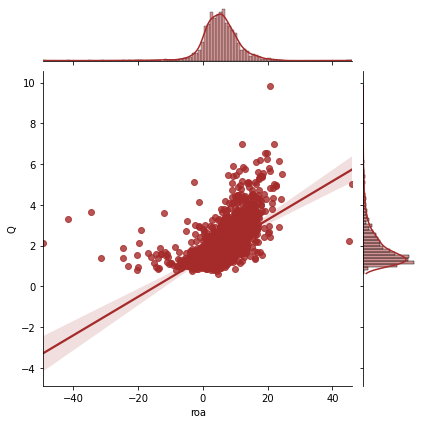

In [19]:
from scipy.stats import pearsonr
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.jointplot(x='roa', y='Q', data=data,  kind="reg", color= 'brown')

<Figure size 720x720 with 0 Axes>

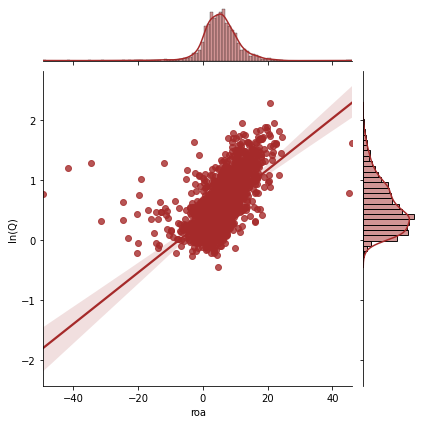

In [20]:
from scipy.stats import pearsonr
import seaborn as sns
plt.figure(figsize = (10, 10))
data['ln(Q)'] = np.log(data['Q'])
sns.jointplot(x='roa', y='ln(Q)', data=data,  kind="reg", color= 'brown')

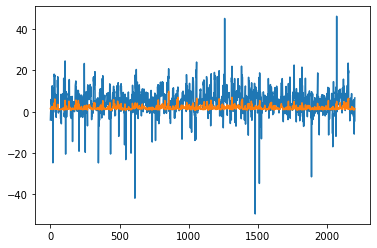

In [21]:
plt.plot(data['roa'])
plt.plot(data['Q'])


In [22]:
y = data['roa']

In [23]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

In [24]:
model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roa   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     90.93
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:55   Log-Likelihood:                -6751.6
No. Observations:                2202   AIC:                         1.363e+04
Df Residuals:                    2140   BIC:                         1.398e+04
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                    13.1808      1.296     10.171      0.000      10.641      15.721
FamFirm                                      0.6119      0.290      2.110      0.035       0.044       1.180
bs_volatility                              -12.5904      1.708     -7.373      0.000     -15.937      -9.244
assets                                      -0.8129      0.153     -5.329      0.000      -1.112      -0.514
hightech                                     1.0977      0.293      3.752      0.000       0.524       1.671
1992                                         1.8879      0.337      5.600      0.000       1.227       2.549
1993                                         0.9557      0.309      3.089      0.002       0.349       1.562
1994                                         2.1470      0.270      7.946      0.000       1.617       2.677
1995                                         1.7484      0.312      5.598      0.000       1.136       2.361
1996                                         1.7092      0.285      6.002      0.000       1.151       2.267
1997                                         1.1337      0.403      2.815      0.005       0.344       1.923
1998                                         1.1899      0.413      2.879      0.004       0.380       2.000
1999                                         2.4090      0.395      6.106      0.000       1.636       3.182
Amusement & Recreation Services              0.6588      0.643      1.025      0.306      -0.601       1.919
Apparel & Accessory Stores                   3.9150      1.494      2.620      0.009       0.986       6.844
Apparel & Other Textile Products             4.9149      0.873      5.632      0.000       3.204       6.625
Auto Repair, Services, & Parking            -2.6964      0.562     -4.795      0.000      -3.798      -1.594
Automative Dealers & Service Stations       -1.5549      0.800     -1.944      0.052      -3.123       0.013
Building Materials & Gardening Supplies      3.4488      0.401      8.611      0.000       2.664       4.234
Business Services                           -0.3325      0.808     -0.412      0.681      -1.915       1.250
Chemical & Allied Products                   3.8953      0.420      9.276      0.000       3.072       4.718
Communications                               0.7330      0.614      1.193      0.233      -0.471       1.937
Depository Institutions                     -0.7481      0.437     -1.714      0.087      -1.604       0.107
Eating & Drinking Places                     3.0184      0.446      6.769      0.000       2.144       3.892
Electric, Gas, & Sanitary Services          -1.3513      0.400     -3.377      0.001      -2.136      -0.567
Electronic & Other Electric Equ

Column VI: column III after replacing $Q$ with $ROA$.

In [25]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roa   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     97.92
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:55   Log-Likelihood:                -6747.6
No. Observations:                2202   AIC:                         1.362e+04
Df Residuals:                    2140   BIC:                         1.397e+04
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                    13.6043      1.253     10.857      0.000      11.148      16.060
founderCEO                                   1.7496      0.711      2.459      0.014       0.355       3.144
bs_volatility                              -13.3682      1.735     -7.706      0.000     -16.768      -9.968
assets                                      -0.8319      0.149     -5.576      0.000      -1.124      -0.540
hightech                                     0.9865      0.287      3.442      0.001       0.425       1.548
1992                                         1.9165      0.333      5.754      0.000       1.264       2.569
1993                                         1.0034      0.308      3.254      0.001       0.399       1.608
1994                                         2.2000      0.266      8.266      0.000       1.678       2.722
1995                                         1.8000      0.307      5.863      0.000       1.198       2.402
1996                                         1.7485      0.281      6.220      0.000       1.198       2.299
1997                                         1.1709      0.400      2.924      0.003       0.386       1.956
1998                                         1.2519      0.409      3.058      0.002       0.449       2.054
1999                                         2.5131      0.393      6.398      0.000       1.743       3.283
Amusement & Recreation Services              0.7132      0.630      1.133      0.257      -0.521       1.947
Apparel & Accessory Stores                   3.6952      1.453      2.542      0.011       0.847       6.544
Apparel & Other Textile Products             4.7909      0.814      5.885      0.000       3.195       6.387
Auto Repair, Services, & Parking            -2.8219      0.562     -5.024      0.000      -3.923      -1.721
Automative Dealers & Service Stations       -1.0390      0.787     -1.321      0.187      -2.581       0.503
Building Materials & Gardening Supplies      2.9716      0.400      7.428      0.000       2.188       3.756
Business Services                           -0.4798      0.813     -0.590      0.555      -2.073       1.114
Chemical & Allied Products                   3.9358      0.417      9.427      0.000       3.118       4.754
Communications                               0.6067      0.642      0.944      0.345      -0.652       1.866
Depository Institutions                     -0.1793      0.374     -0.480      0.631      -0.912       0.553
Eating & Drinking Places                     3.1839      0.379      8.405      0.000       2.441       3.926
Electric, Gas, & Sanitary Services          -1.7585      0.397     -4.432      0.000      -2.536      -0.981
Electronic & Other Electric Equ

Column VII: column IIV after replacing $Q$ with $ROA$.

In [26]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['nonfounderfam', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roa   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     91.75
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:56   Log-Likelihood:                -6754.2
No. Observations:                2202   AIC:                         1.363e+04
Df Residuals:                    2140   BIC:                         1.399e+04
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                    13.6552      1.287     10.607      0.000      11.132      16.179
nonfounderfam                                0.0814      0.281      0.290      0.772      -0.469       0.632
bs_volatility                              -12.4908      1.706     -7.323      0.000     -15.834      -9.148
assets                                      -0.8592      0.151     -5.683      0.000      -1.156      -0.563
hightech                                     1.0825      0.291      3.716      0.000       0.512       1.653
1992                                         1.9494      0.336      5.807      0.000       1.291       2.607
1993                                         1.0259      0.313      3.278      0.001       0.412       1.639
1994                                         2.2142      0.269      8.218      0.000       1.686       2.742
1995                                         1.8247      0.312      5.845      0.000       1.213       2.437
1996                                         1.7610      0.284      6.190      0.000       1.203       2.319
1997                                         1.1877      0.402      2.956      0.003       0.400       1.975
1998                                         1.2395      0.414      2.997      0.003       0.429       2.050
1999                                         2.4527      0.393      6.236      0.000       1.682       3.224
Amusement & Recreation Services              0.4277      0.638      0.671      0.502      -0.822       1.678
Apparel & Accessory Stores                   4.0855      1.512      2.701      0.007       1.121       7.050
Apparel & Other Textile Products             4.9713      0.828      6.003      0.000       3.348       6.594
Auto Repair, Services, & Parking            -2.8572      0.558     -5.120      0.000      -3.951      -1.764
Automative Dealers & Service Stations       -1.2456      0.795     -1.567      0.117      -2.803       0.312
Building Materials & Gardening Supplies      3.4709      0.453      7.659      0.000       2.583       4.359
Business Services                           -0.3059      0.806     -0.379      0.704      -1.886       1.275
Chemical & Allied Products                   3.8807      0.418      9.282      0.000       3.061       4.700
Communications                               0.8603      0.592      1.452      0.147      -0.301       2.022
Depository Institutions                     -0.3407      0.441     -0.772      0.440      -1.205       0.524
Eating & Drinking Places                     3.1218      0.399      7.820      0.000       2.339       3.904
Electric, Gas, & Sanitary Services          -1.2466      0.445     -2.800      0.005      -2.119      -0.374
Electronic & Other Electric Equ

==================================================================

Column VIII: column II after replacing $Q$ with $ln(Q)$.

In [27]:
y = np.log(data['Q'])

In [28]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

In [29]:
model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     135.8
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:56   Log-Likelihood:                -656.85
No. Observations:                2202   AIC:                             1438.
Df Residuals:                    2140   BIC:                             1791.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     0.8600      0.076     11.352      0.000       0.712       1.009
FamFirm                                      0.0358      0.019      1.912      0.056      -0.001       0.072
bs_volatility                               -0.4735      0.096     -4.939      0.000      -0.661      -0.286
assets                                      -0.0452      0.009     -5.138      0.000      -0.062      -0.028
hightech                                     0.1571      0.017      9.001      0.000       0.123       0.191
1992                                         0.0842      0.025      3.361      0.001       0.035       0.133
1993                                         0.0669      0.019      3.610      0.000       0.031       0.103
1994                                         0.0262      0.019      1.394      0.163      -0.011       0.063
1995                                         0.0663      0.019      3.579      0.000       0.030       0.103
1996                                         0.1065      0.019      5.600      0.000       0.069       0.144
1997                                         0.1804      0.020      9.132      0.000       0.142       0.219
1998                                         0.1839      0.024      7.623      0.000       0.137       0.231
1999                                         0.1457      0.027      5.340      0.000       0.092       0.199
Amusement & Recreation Services              0.0621      0.108      0.574      0.566      -0.150       0.274
Apparel & Accessory Stores                   0.1685      0.072      2.343      0.019       0.028       0.309
Apparel & Other Textile Products             0.0748      0.052      1.431      0.152      -0.028       0.177
Auto Repair, Services, & Parking            -0.3198      0.029    -10.947      0.000      -0.377      -0.263
Automative Dealers & Service Stations       -0.1592      0.132     -1.206      0.228      -0.418       0.100
Building Materials & Gardening Supplies      0.4993      0.088      5.650      0.000       0.326       0.673
Business Services                            0.1684      0.048      3.525      0.000       0.075       0.262
Chemical & Allied Products                   0.4061      0.030     13.728      0.000       0.348       0.464
Communications                               0.2018      0.034      5.924      0.000       0.135       0.269
Depository Institutions                     -0.0679      0.034     -2.006      0.045      -0.134      -0.002
Eating & Drinking Places                     0.2681      0.065      4.101      0.000       0.140       0.396
Electric, Gas, & Sanitary Services          -0.1017      0.048     -2.098      0.036      -0.197      -0.007
Electronic & Other Electric Equ

Column IX: column III after replacing $Q$ with $ln(Q)$.

In [30]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     137.7
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:56   Log-Likelihood:                -653.49
No. Observations:                2202   AIC:                             1431.
Df Residuals:                    2140   BIC:                             1784.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     0.8848      0.074     11.880      0.000       0.739       1.031
founderCEO                                   0.1014      0.038      2.655      0.008       0.027       0.176
bs_volatility                               -0.5185      0.098     -5.300      0.000      -0.710      -0.327
assets                                      -0.0463      0.009     -5.339      0.000      -0.063      -0.029
hightech                                     0.1506      0.017      8.843      0.000       0.117       0.184
1992                                         0.0859      0.025      3.464      0.001       0.037       0.134
1993                                         0.0697      0.018      3.796      0.000       0.034       0.106
1994                                         0.0293      0.019      1.573      0.116      -0.007       0.066
1995                                         0.0693      0.018      3.790      0.000       0.033       0.105
1996                                         0.1089      0.019      5.773      0.000       0.072       0.146
1997                                         0.1826      0.020      9.332      0.000       0.144       0.221
1998                                         0.1875      0.024      7.757      0.000       0.140       0.235
1999                                         0.1517      0.027      5.541      0.000       0.098       0.205
Amusement & Recreation Services              0.0651      0.108      0.604      0.546      -0.146       0.276
Apparel & Accessory Stores                   0.1559      0.073      2.124      0.034       0.012       0.300
Apparel & Other Textile Products             0.0676      0.049      1.371      0.171      -0.029       0.164
Auto Repair, Services, & Parking            -0.3271      0.029    -11.141      0.000      -0.385      -0.270
Automative Dealers & Service Stations       -0.1291      0.131     -0.982      0.326      -0.387       0.129
Building Materials & Gardening Supplies      0.4717      0.083      5.672      0.000       0.309       0.635
Business Services                            0.1599      0.048      3.360      0.001       0.067       0.253
Chemical & Allied Products                   0.4084      0.030     13.813      0.000       0.350       0.466
Communications                               0.1945      0.035      5.584      0.000       0.126       0.263
Depository Institutions                     -0.0347      0.031     -1.126      0.260      -0.095       0.026
Eating & Drinking Places                     0.2778      0.061      4.529      0.000       0.158       0.398
Electric, Gas, & Sanitary Services          -0.1252      0.045     -2.803      0.005      -0.213      -0.038
Electronic & Other Electric Equ

Column X: column IV after replacing $Q$ with $ln(Q)$.

In [31]:
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['nonfounderfam', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

model = sm.OLS(y, X).fit(cov_type='HC1')
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:56   Log-Likelihood:                -659.07
No. Observations:                2202   AIC:                             1442.
Df Residuals:                    2140   BIC:                             1795.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     0.8875      0.076     11.711      0.000       0.739       1.036
nonfounderfam                                0.0051      0.020      0.255      0.799      -0.034       0.044
bs_volatility                               -0.4675      0.095     -4.914      0.000      -0.654      -0.281
assets                                      -0.0478      0.009     -5.460      0.000      -0.065      -0.031
hightech                                     0.1562      0.018      8.925      0.000       0.122       0.191
1992                                         0.0878      0.025      3.498      0.000       0.039       0.137
1993                                         0.0710      0.019      3.834      0.000       0.035       0.107
1994                                         0.0301      0.019      1.602      0.109      -0.007       0.067
1995                                         0.0707      0.019      3.811      0.000       0.034       0.107
1996                                         0.1096      0.019      5.752      0.000       0.072       0.147
1997                                         0.1835      0.020      9.275      0.000       0.145       0.222
1998                                         0.1867      0.024      7.739      0.000       0.139       0.234
1999                                         0.1482      0.027      5.443      0.000       0.095       0.202
Amusement & Recreation Services              0.0486      0.108      0.451      0.652      -0.163       0.260
Apparel & Accessory Stores                   0.1785      0.073      2.459      0.014       0.036       0.321
Apparel & Other Textile Products             0.0780      0.050      1.550      0.121      -0.021       0.177
Auto Repair, Services, & Parking            -0.3291      0.029    -11.384      0.000      -0.386      -0.272
Automative Dealers & Service Stations       -0.1413      0.132     -1.072      0.284      -0.400       0.117
Building Materials & Gardening Supplies      0.5007      0.092      5.471      0.000       0.321       0.680
Business Services                            0.1700      0.048      3.558      0.000       0.076       0.264
Chemical & Allied Products                   0.4052      0.030     13.697      0.000       0.347       0.463
Communications                               0.2092      0.034      6.164      0.000       0.143       0.276
Depository Institutions                     -0.0444      0.035     -1.261      0.207      -0.113       0.025
Eating & Drinking Places                     0.2741      0.063      4.371      0.000       0.151       0.397
Electric, Gas, & Sanitary Services          -0.0955      0.053     -1.814      0.070      -0.199       0.008
Electronic & Other Electric Equ

Column XI: Reestimating the specification in Column II after eliminating observations with founderCEO $==1$. 

In [32]:
data = data[data['founderCEO'] == 0]

X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant'], index=data.index), data[['FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)


y = data['Q']

In [33]:
model = sm.OLS(y, X).fit(cov_type='HC1')
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 64, but rank is 62
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:56   Log-Likelihood:                -2347.0
No. Observations:                2052   AIC:                             4818.
Df Residuals:                    1990   BIC:                             5167.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     2.4203      0.183     13.223      0.000       2.062       2.779
FamFirm                                      0.0391      0.050      0.788      0.430      -0.058       0.136
bs_volatility                               -0.6292      0.217     -2.896      0.004      -1.055      -0.203
assets                                      -0.1025      0.022     -4.710      0.000      -0.145      -0.060
hightech                                     0.2918      0.038      7.707      0.000       0.218       0.366
1992                                         0.2300      0.060      3.849      0.000       0.113       0.347
1993                                         0.1778      0.042      4.205      0.000       0.095       0.261
1994                                         0.1198      0.044      2.742      0.006       0.034       0.205
1995                                         0.2047      0.045      4.580      0.000       0.117       0.292
1996                                         0.2863      0.048      5.944      0.000       0.192       0.381
1997                                         0.4317      0.047      9.116      0.000       0.339       0.524
1998                                         0.5042      0.059      8.493      0.000       0.388       0.621
1999                                         0.4658      0.065      7.161      0.000       0.338       0.593
Amusement & Recreation Services              0.0738      0.207      0.357      0.721      -0.331       0.479
Apparel & Accessory Stores                   0.4529      0.320      1.414      0.157      -0.175       1.081
Apparel & Other Textile Products            -0.0077      0.083     -0.092      0.927      -0.170       0.155
Auto Repair, Services, & Parking            -0.5325      0.062     -8.616      0.000      -0.654      -0.411
Automative Dealers & Service Stations       -0.3052      0.212     -1.441      0.150      -0.720       0.110
Building Materials & Gardening Supplies      0.4351      0.143      3.052      0.002       0.156       0.715
Business Services                            0.4091      0.091      4.507      0.000       0.231       0.587
Chemical & Allied Products                   0.9519      0.082     11.632      0.000       0.791       1.112
Communications                               0.3460      0.078      4.423      0.000       0.193       0.499
Depository Institutions                     -0.1519      0.059     -2.559      0.010      -0.268      -0.036
Eating & Drinking Places                     0.4544      0.146      3.107      0.002       0.168       0.741
Electric, Gas, & Sanitary Services          -0.3289      0.054     -6.127      0.000      -0.434      -0.224
Electronic & Other Electric Equ

Column XII: Reestimating the specification in Column III after eliminating observations with nonfounderfam $==1$. 

In [34]:
data = pd.read_excel(path, sheet_name='Sheet2')

data = data[data.columns[:14]]
data = data[data['nonfounderfam'] == 0]

X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant'], index=data.index), data[['founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)
y = data['Q']

model = sm.OLS(y, X).fit(cov_type='HC1')
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 58
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     591.6
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:58   Log-Likelihood:                -1788.5
No. Observations:                1617   AIC:                             3693.
Df Residuals:                    1559   BIC:                             4006.
Df Model:                          57                                         
Covariance Type:                  HC1                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
constant                                     2.2074      0.216     10.202      0.000       1.783       2.631
founderCEO                                   0.4047      0.092      4.414      0.000       0.225       0.584
bs_volatility                               -0.8646      0.220     -3.932      0.000      -1.296      -0.434
assets                                      -0.0639      0.026     -2.474      0.013      -0.115      -0.013
hightech                                     0.2607      0.041      6.426      0.000       0.181       0.340
1992                                         0.2359      0.068      3.494      0.000       0.104       0.368
1993                                         0.1723      0.050      3.463      0.001       0.075       0.270
1994                                         0.0964      0.048      1.999      0.046       0.002       0.191
1995                                         0.1866      0.050      3.742      0.000       0.089       0.284
1996                                         0.2763      0.052      5.274      0.000       0.174       0.379
1997                                         0.4028      0.053      7.571      0.000       0.298       0.507
1998                                         0.4582      0.064      7.140      0.000       0.332       0.584
1999                                         0.3788      0.070      5.436      0.000       0.242       0.515
Amusement & Recreation Services              0.1275      0.207      0.617      0.537      -0.277       0.532
Apparel & Accessory Stores                   0.0310      0.155      0.200      0.841      -0.273       0.335
Apparel & Other Textile Products             0.1212      0.170      0.713      0.476      -0.212       0.454
Auto Repair, Services, & Parking            -0.5674      0.057     -9.942      0.000      -0.679      -0.456
Building Materials & Gardening Supplies      1.0623      0.265      4.010      0.000       0.543       1.581
Business Services                            0.3369      0.113      2.985      0.003       0.116       0.558
Chemical & Allied Products                   0.9701      0.100      9.708      0.000       0.774       1.166
Communications                               0.1447      0.084      1.714      0.086      -0.021       0.310
Eating & Drinking Places                     0.8352      0.137      6.092      0.000       0.566       1.104
Electric, Gas, & Sanitary Services          -0.3864      0.059     -6.588      0.000      -0.501      -0.271
Electronic & Other Electric Equipment       -0.0377      0.074     -0.507      0.612      -0.183       0.108
Engineering & Management Services            1.2249      0.255      4.808      0.000       0.726       1.724
Fabricated Metal Products      

column XIII:



In [35]:
data = pd.read_excel(path, sheet_name='Sheet2')

data = data[data.columns[:14]]
X = pd.concat([pd.DataFrame(np.ones(len(data)), columns=['constant']), data[['FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               #pd.get_dummies(data['industry name']),
               pd.get_dummies(data['Ticker'])], axis=1)



y = data['Q']
X

,constant,FamFirm,bs_volatility,assets,hightech,1992,1993,1994,1995,1996,1997,1998,1999,9441B,AA,AAL,AAPL,ABS,ABT,ACK,ACY.,ADM,ADSK,AET,AGC,AHC,AIG,AM,AMD,AMGN,AMH.,AMP,AMR,AN.,ANDW,APD,AR,ARC,AS,ASC.1,...,TJX,TKR,TMC,TMK,TNB,TOY,TRB,TRW,TWX,TX,TXN,U,UAL,UCC,UCL,UIS,UK,UNP,USH,USS,UST,UTX,VAT,VFC,WAG,WEN,WHR,WIN,WLA,WMB,WMT,WMX,WOR,WWY,WY,X,XOM,XRX,YELL,Z
0,1.0,0,0.190,8.579492,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0.221,8.261449,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0.246,9.307748,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0.228,9.358493,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0.222,9.421670,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,1.0,0,0.252,8.432289,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2198,1.0,0,0.300,8.336390,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2199,1.0,0,0.315,8.162231,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2200,1.0,0,0.365,8.153637,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
model = sm.OLS(y, X).fit(cov_type='HC1')
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 332, but rank is 327
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Q   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:57:59   Log-Likelihood:                -1379.7
No. Observations:                2202   AIC:                             3421.
Df Residuals:                    1871   BIC:                             5307.
Df Model:                         330                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
constant          4.3494      0.485      8.976      0.000       3.400       5.299
FamFirm           0.0357      0.086      0.416      0.677      -0.132       0.204
bs_volatility    -0.6045      0.229     -2.639      0.008      -1.053      -0.156
assets           -0.3264      0.060     -5.410      0.000      -0.445      -0.208
hightech         -0.1550      0.099     -1.562      0.118      -0.349       0.039
1992              0.3600      0.066      5.418      0.000       0.230       0.490
1993              0.3880      0.058      6.656      0.000       0.274       0.502
1994              0.3167      0.059      5.360      0.000       0.201       0.432
1995              0.4381      0.061      7.226      0.000       0.319       0.557
1996              0.5301      0.063      8.401      0.000       0.406       0.654
1997              0.7294      0.068     10.749      0.000       0.596       0.862
1998              0.8194      0.072     11.336      0.000       0.678       0.961
1999              0.7677      0.091      8.445      0.000       0.590       0.946
9441B            -0.2926      0.063     -4.676      0.000      -0.415      -0.170
AA               -0.1371      0.136     -1.008      0.314      -0.404       0.130
AAL              -0.7966      0.064    -12.417      0.000      -0.922      -0.671
AAPL             -0.2697      0.143     -1.886      0.059      -0.550       0.011
ABS               0.4665      0.166      2.802      0.005       0.140       0.793
ABT               2.5834      0.260      9.926      0.000       2.073       3.094
ACK              -0.5795      0.126     -4.606      0.000      -0.826      -0.333
ACY.             -0.2661      0.048     -5.587      0.000      -0.359      -0.173
ADM              -0.4450      0.095     -4.689      0.000      -0.631      -0.259
ADSK              0.7630      0.221      3.449      0.001       0.329       1.197
AET               0.0173      0.185      0.094      0.925      -0.346       0.380
AGC              -0.0807      0.151     -0.535      0.593      -0.376       0.215
AHC              -0.6560      0.092     -7.135      0.000      -0.836      -0.476
AIG               0.3083      0.198      1.559      0.119      -0.079       0.696
AM               -0.9436      0.207     -4.565      0.000      -1.349      -0.538
AMD              -0.5341      0.131     -4.065      0.000      -0.792      -0.277
AMGN              2.6112      0.283      9.236      0.000       2.057       3.165
AMH.             -0.6220      0.142     -4.391      0.000      -0.900      -0.344
AMP               0.5310      0.114      4.653      0.000       0.307       0.755
AMR              -0.3549      0.097     -3.658      0.000      -0.545      -0.165
AN.               0.2347      0.113      2.085      0.037       0.014       0.455
ANDW              0.4939      0.545      0.906   

## 5 Instrumental Variable estimation

5.1 Assessing the quality of an instrument

In [37]:
data = data[data['meanagef'] != 0].dropna()

In [57]:
data

,Ticker,Year,Coname,FamFirm,meanagef,assets,bs_volatility,roa,founderCEO,Q,digit2_in,hightech,nonfounderfam,industry name,const,residual
2,AA,1992,ALUMINUM COMPANY AMER,0,95.0,11023.099609,0.246,0.184,0,1.235134,33,0,0,Primary Metal Industries,1,0.073937
3,AA,1993,ALUMINUM COMPANY AMER,0,95.0,11596.900391,0.228,0.023,0,1.224374,33,0,0,Primary Metal Industries,1,0.062316
4,AA,1994,ALUMINUM COMPANY AMER,0,95.0,12353.200195,0.222,3.570,0,1.307375,33,0,0,Primary Metal Industries,1,0.066241
5,AA,1995,ALUMINUM COMPANY AMER,0,95.0,13643.400391,0.213,5.779,0,1.361618,33,0,0,Primary Metal Industries,1,0.077545
6,AA,1996,ALUMINUM COMPANY AMER,0,95.0,13449.900391,0.206,3.813,0,1.490034,33,0,0,Primary Metal Industries,1,0.086751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,Z,1993,WOOLWORTH CORP,0,95.0,4593.000000,0.252,-10.777,0,1.449708,56,0,0,Apparel & Accessory Stores,1,-0.066936
2198,Z,1994,WOOLWORTH CORP,0,95.0,4173.000000,0.300,1.126,0,1.174683,56,0,0,Apparel & Accessory Stores,1,-0.062921
2199,Z,1995,WOOLWORTH CORP,0,95.0,3506.000000,0.315,-4.678,0,1.076390,56,0,0,Apparel & Accessory Stores,1,-0.054751
2200,Z,1996,WOOLWORTH CORP,0,95.0,3476.000000,0.365,4.862,0,1.401959,56,0,0,Apparel & Accessory Stores,1,-0.042733


array([[ 1.      , -0.700844],
       [-0.700844,  1.      ]])

<Figure size 576x396 with 0 Axes>

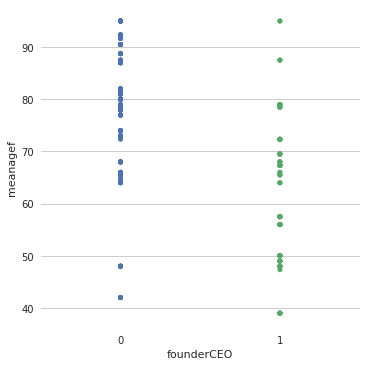

In [38]:
##Plotting the relationship between X and Y
plt.style.use('seaborn')

#sns.set_style("white")

sns.set_style("whitegrid")
sns.despine(bottom = True, left = True)

sns.catplot(x = 'founderCEO', y = 'meanagef', data = data,  jitter=False)
#sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

np.corrcoef(data['founderCEO'], data['meanagef'])

In [39]:
scipy.stats.ttest_ind(data['meanagef'][data['founderCEO'] == 0], data['meanagef'][data['founderCEO'] == 1])

Ttest_indResult(statistic=36.867321076344126, pvalue=7.969197778425855e-209)

In [49]:
np.corrcoef(data['Q'], data['meanagef'])

array([[ 1.        , -0.13603332],
       [-0.13603332,  1.        ]])

In [55]:
X = pd.concat([data[['const', 'FamFirm', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)



y = data['Q']


model = sm.OLS(y, X).fit()

np.corrcoef(model.resid, data['meanagef'])

array([[ 1.        , -0.17687666],
       [-0.17687666,  1.        ]])

In [56]:
scipy.stats.ttest_ind(model.resid, data['meanagef'])

Ttest_indResult(statistic=-305.5647284554123, pvalue=0.0)

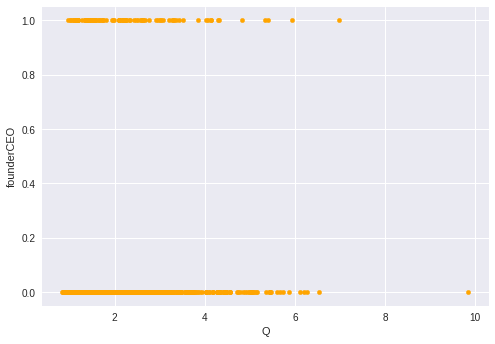

In [40]:
##Plotting the relationship between 'y' and 'founderCEO' to see if 'founderCEO' may be an endogenous variable!
#we can observe a fairly negative relationship?

plt.style.use('seaborn')
data.plot(x='Q', y='founderCEO', kind='scatter', color='orange')
plt.show()

In [41]:
# First stage: regressing X (data['founderCEO']) on Z (data['meanagef'])
data['const'] = 1
model = sm.OLS(data['founderCEO'], data[['const', 'meanagef']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             founderCEO   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1359.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          7.97e-209
Time:                        09:58:00   Log-Likelihood:                 440.46
No. Observations:                1410   AIC:                            -876.9
Df Residuals:                    1408   BIC:                            -866.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4855      0.039     38.294      0.0

In [42]:
X_hat = pd.DataFrame(model.predict(data[['const', 'meanagef']]), columns=['IV'])

X = pd.concat([pd.DataFrame(X_hat),
               data[['bs_volatility', 'const']],
               np.log(data['assets']), 
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)


y = data['Q']
X

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     13.85
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           8.02e-88
Time:                        09:58:01   Log-Likelihood:                -1616.7
No. Observations:                1410   AIC:                             3333.
Df Residuals:                    1360   BIC:                             3596.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

5.2 Hausman test

In [43]:
X = pd.concat([data[['const', 'founderCEO', 'bs_volatility', 'meanagef']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)
X

,const,founderCEO,bs_volatility,meanagef,assets,hightech,1992,1993,1994,1995,1996,1997,1998,1999,Apparel & Accessory Stores,Apparel & Other Textile Products,"Auto Repair, Services, & Parking",Building Materials & Gardening Supplies,Business Services,Chemical & Allied Products,Communications,Eating & Drinking Places,"Electric, Gas, & Sanitary Services",Electronic & Other Electric Equipment,Fabricated Metal Products,Food & Kindred Products,Food Stores,Furniture & Fixtures,Furniture & Homefurnishings Stores,General Merchandise Stores,Health Services,"Heavy Construction, Except Building",Hotels & Other Lodging Places,Industrial Machinery & Equipment,Instruments & Related Products,Insurance Carriers,Lumber & Wood Products,Miscellaneous Manufacturing Industries,Miscellaneous Retail,Motion Pictures,Oil & Gas Extraction,Paper & Allied Products,Petroleum & Coal Products,Primary Metal Industries,Printing & Publishing,Railroad Transportation,Rubber & Miscellaneous Plastics Products,"Stone, Clay, & Glass Products",Tobacco Products,Transportation Equipment,Transportation by Air,Trucking & Warehousing,Wholesale Trade – Durable Goods,Wholesale Trade – Nondurable Goods
2,1,0,0.246,95.0,9.307748,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0.228,95.0,9.358493,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0.222,95.0,9.421670,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0.213,95.0,9.521011,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0,0.206,95.0,9.506727,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,1,0,0.252,95.0,8.432289,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2198,1,0,0.300,95.0,8.336390,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2199,1,0,0.315,95.0,8.162231,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2200,1,0,0.365,95.0,8.153637,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# First step: Run OLS regression of endogenous variable xk on all exogenous variables and the instrument using OLS

reg_fs = sm.OLS(data['founderCEO'],
                    X.drop(columns = ['founderCEO'])).fit()
print(reg_fs.summary())



                            OLS Regression Results                            
Dep. Variable:             founderCEO   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     39.43
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          1.46e-223
Time:                        09:58:01   Log-Likelihood:                 587.31
No. Observations:                1410   AIC:                            -1075.
Df Residuals:                    1360   BIC:                            -812.1
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [45]:
#We add a constant column with value 1 to the current data to make the true dimension(i.e., beta0*1=beta0)
#data['const'] = 1

###FIRST STAGE regression model
#reg_fs = sm.OLS(data['founderCEO'],
 #                   data[['const', 'meanagef']]).fit()
#print(reg_fs.summary())

In [46]:
###SECOND STAGE regression model
X = pd.concat([data[['const', 'founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)
#we first need to retrive the residuals:
data['residual'] = reg_fs.resid

reg_ss = sm.OLS(data['Q'],
                   pd.concat([data['residual'], X], axis = 1) ).fit()
print(reg_ss.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.83e-87
Time:                        09:58:01   Log-Likelihood:                -1616.6
No. Observations:                1410   AIC:                             3335.
Df Residuals:                    1359   BIC:                             3603.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

5.3 IV coefficient estimates

In [47]:
X = pd.concat([data[['const','founderCEO', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

Z =  pd.concat([data[['const', 'meanagef', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)


exog = pd.concat([data[['const', 'bs_volatility']], np.log(data['assets']),
               data['hightech'], pd.get_dummies(data['Year']),
               pd.get_dummies(data['industry name'])], axis=1)

endog = data['founderCEO']

instruments = data['meanagef']
y = data['Q']

model = IV2SLS(y, exog[['const', 'bs_volatility', 'assets', 'hightech']], endog, instruments).fit()
print(model)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                      Q   R-squared:                      0.0238
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0210
No. Observations:                1410   F-statistic:                    79.173
Date:                Fri, Jul 23 2021   P-value (F-stat)                0.0000
Time:                        09:58:01   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
const             2.6545     0.2351     11.291     0.0000      2.1937      3.1153
bs_volatility    -2.0406     0.2544    -